<code style="background:yellow;color:red">
    <b>Note: there are 2 short lab report sections in this notebook. Make sure to find both! There is Lab report part 1 and Lab report part 2</b>
</code>


**Important**: you need to install seaborn and statsmodels to run this notebook: `pip3 install statsmodels seaborn`

## More on mathematical models: Statistical models

I find it very hard to develop an understanding of a modeling framework without applying it in a specific domain -- and eventually more than one domain. 

For the next few weeks, we are going to focus on the domain of **spoken word recognition (SWR)**. This happens to be my primary area of expertise in psychology / cognitive science / cognitive neuroscience -- and computational modeling. 

As you'll read in the recent review chapter that Anne Marie Crinnion and I wrote, this is a domain where scientists have amassed a lot of data and have discovered and described a lot of phenomena. However, we are still far from a deep understanding of how humans recognize spoken words. *(Note: please do read the Magnuson \& Crinnion paper, but do not stress about details -- I will go over fundamentals in class.)*

Let's consider the nature of the problem. I'll show some demos in class to illustrate how speech is an amazingly complex signal. We have a sound source (mainly from vibrating our vocal folds) that drives acoustic energy through the malleable tube of our vocal tract. That acoustic energy is modulated by how we move or position our jaw, tongue, and lips. There are other articulators you may not even realize you have! The glottis operates like a valve within your larynx, and can be used to stop airflow (people from Connecticut tend to use a 'glottal stop' for the t-like sound in 'mitten'). You can also raise and lower your *velum*; when it is lowered, energy flows through your nose allowing you to make *nasal* sounds like /m/, /n/, and /ŋ/ (the final sound in 'ring'). 

Famously, there is a *lack of invariance* in the mapping from acoustics to our perception of consonants and vowels (the more general term is *phonemes*). Instead of an alphabet-like, discrete mapping, there is a complex, *many-to-many* mapping. That is, many different acoustic patterns can map to the same phoneme, while an identical acoustic pattern can map to different phonemes depending on context. 

While this many-to-many mapping was discovered by UConn scientists (e.g., psychologists Alvin Liberman and Donald Shankweiler, and linguists Ignatius Mattingly and Arthur Abramson) and their collaborators over a period of ~20 years (1950s-1970s), we still do not deeply understand how people achieve robust speech perception and word recognition *despite* the lack of invariance. 

But how can we get ideas about how the process of spoken word recognition works? We need a *lot* of systematic observations, and then we have to develop *information processing theories*, beginning at Marr's (1982) *computational theory* level. For this, we need to try to identify and describe the inputs and outputs. For spoken word recognition, the inputs are the acoustic patterns over time that correspond to a word. The output needs to be some measure of processing that we will use to create an operational definition of recognition. So for example, we could present people with recordings of spoken words and simply ask them to repeat them as quickly as they can (a task known as *auditory naming* or *auditory shadowing*). If we use this task, we would likely eventually discover some interesting facts, such as these:

- People are faster to shadow/name when
    - The word is highly familiar or has high *frequency of occurrence*
    - The word has very high-probability phoneme sequences
    - The word follows a semantically related word (a *priming* effect; for example, people are faster to name *doctor* when it is preceded by *nurse* vs. an unrelated word like *sandwich*)
    
Even these findings indicate some important principles we would want to capture in a theory. We will want the theory to include a basis for high probabilities (of words of subparts of words) to promote faster processing, and we would also need to consider how/why semantic relatedness might matter. 

Another commonly used task is called *lexical decision*. In a lexical decision task, we also create many *nonwords*, or more aptly, *pseudowords*, because they have to be pronouceable strings in English. So we might create nonword patterns like *fahv*, *layf*, or *pilch*. We would usually want to avoid patterns that do not occur in English. For example, no words in English start with *bw-* (aside from loan words, like *bwana*). This sequence *does* occur in other places (e.g., *su**bw**ay*), and of course, other languages use this sequence at word onset (e.g., French *bois* or *boire* or Spanish *bueno*). Now we will present listeners with a series of stimuli that may be words or pseudowords. Their task is to answer the question *is this a word?* for each item. So they should press a key for YES if the stimulus is *frame* but NO if the stimulus is *pilch*. 

With this kind of task, scientists have confirmed the patterns I mentioned above (sensitivity to probability and semantic relatedness, providing *converging evidence* from two tasks), and also discovered many more such as:

- Words are recognized more *slowly* if there are many words that are highly similar to them in sound (phonological neighbors)
  - Phonological neighbors are typically defined using the DAS rule: 2 words are neighbors if they differ by no more than 1 _D_eletion, _A_ddition, or _S_ubstitution
  - So 'cat' has the phonemes /kæt/ and has a deletion neighbor (at), addition neighbors (scat, cast), and many substitution neighobrs (bat, cot, can, etc.)
- Having more onset competitors ('cohorts')
  - We can predict the position in a word where people will become highly confident of what the word is: its *uniqueness point* is the position where it is the only possible word (e.g., when you get to the *f* sound in *xylophone*, it can only be one word).


So the primary kind of observation we typically have in this domain is reaction time for tasks like naming or lexical decision. From that data, we try to infer what is happening during the process of word recognition. 

To get a sense of how scientists do this -- and to see how some classic models of human spoken word recognition developed -- we will work with some data. We will delve very shallowly into the kinds of statistical analyses that are used in this domain. But the key goal is to get our feet wet with some realistic data because as we progress through this section of the course, we will work towards linking human performance data with computational models.  

`Note that while we will look at real statistical models, you are not expected to learn all the details. I will explain them conceptually. The goal is to give you a sense of how we work in this domain.`
    


-----------
## A slight tangent: Pseudo data

Now eventually we will need to work with *real* data -- actual mean reaction times (RTs) for 
words and real frequency, cohort, and neighborhood values. But the 
utility of this exercise is to see some ways to play around with data 
and get a sense of how different correlational relationships might 
play out in a statistical analysis. This may give us a sense of how 
hard it is to predict multidimensional relations. 

We will create a correlation matrix with desired correlations between
variables and then run a simple multiple regression.

*Pseudo data* can be thought of as a model system, but not a computational model. The idea is that we can generate *distributions* of multiple values that have particular relations between them *that we specify*. So if we have ideas about kinds of relationships that may exist, we can build them into our pseudo data and see how we can suss them out with statistics. We could also compare pseudo data to a working computational model, but any failures of the model to match the pseudo data may not be very meaningful. (Why?)

Later in this notebook, you will read about a simple approach to 
multiple regression. We can discuss it in class. `Note that 
every time you rerun this code block, you will get new random data 
(unless you set the random seed to a fixed value).` So you could 
re-run this block multiple times to get a sense of the range of outcomes
you can get with this approach.

This next code block generates pseudo data, where words vary in frequency of occurrence, number of neighbors, and number of cohorts. We will build in some correlations between those dimensions. 
 

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

base_rt = 750 # a very typical RT for spoken words; 
              # we will create distributions around this value
bump_rt = 250 # a value we can use to boost that base_rt sometimes
min_rt = 400  # minimum acceptable RT; see 'clipping' below
max_rt = 1500 # max acceptable RT
base_predictor = 50 # an arbitrary value we will use to 'seed' frequency, cohorts, and neighbors
bump_predictor = 20


# uncomment to set the randomseed so you always get the same results
#np.random.seed(37)

# Function to generate correlated data using Cholesky decomposition
def generate_correlated_data(target_corr_matrix, num_samples):
    """Generate correlated data using Cholesky decomposition."""
    L = np.linalg.cholesky(target_corr_matrix)
    
    # Generate uncorrelated data
    uncorrelated_data = np.random.randn(num_samples, target_corr_matrix.shape[0])
    
    # Use Cholesky decomposition to introduce the desired correlations
    correlated_data = uncorrelated_data @ L.T
    return correlated_data

# We need to build a list of simple words that will be our 'pretend' stimulus items.
words = [
    'strength', 'shrift', 'friend', 'bread', 'dread', 'fled', 'shred', 'tread', 'bland', 'brand',
    'strand', 'stand', 'grand', 'land', 'hand', 'sand', 'and', 'band', 'gland', 'chant', 'plant',
    'rant', 'slant', 'grant', 'trance', 'dance', 'prance', 'lance', 'chance', 'mance', 'glance',
    'clad', 'glad', 'plaid', 'scad', 'sked', 'shad', 'sped', 'thread', 'pled', 'read', 'lead', 'bead', 
    'mead', 'deed', 'reed', 'weed', 'feed', 'heed', 'need', 'seed', 'sleek', 'bleak', 'creak', 'leak', 
    'peak', 'beak', 'reek', 'seek', 'teak', 'geek', 'sheik', 'cheek', 'sneak', 'speak', 'freak', 'streak', 
    'bleed', 'creed', 'breed', 'tweed', 'freed', 'speed', 'steed', 'meed', 'beep', 'peep', 'deep', 'seep', 
    'weep', 'keep', 'sleep', 'steep', 'creep', 'sheep', 'sweep', 'bleep', 'blew', 'drew', 'grew', 'screw', 
    'stew', 'shrew', 'threw', 'skew', 'chew', 'flew', 'slew', 'hew', 'brisk', 'disk', 'frisk', 'whisk', 
    'risk', 'ask', 'bask', 'cask', 'mask', 'task', 'flask', 'brisk', 'crisp', 'whisk', 'twist', 'wrist', 
    'list', 'fist', 'mist', 'gist', 'wisp', 'hiss', 'kiss', 'miss', 'diss', 'bliss', 'this', 'whiz', 
    'biz', 'fizz', 'dizz', 'fray', 'gray', 'play', 'slay', 'pray', 
    'tray', 'stray', 'spray', 'stay', 'sway', 'weigh', 'deign', 'feign', 'reign', 'vein', 'vane', 'wane',
    'blame', 'flame', 'claim', 'aim', 'game', 'tame', 'same', 'name', 'shame', 'frame', 
    'came', 'dame', 'lame', 'mime', 'chime', 'lime', 'prime', 'time', 'climb', 'slime', 
    'rhyme', 'thyme', 'dim', 'brim', 'rim', 'trim', 'grim', 'swim', 'hymn', 'limb', 'sim', 
    'vim', 'whim', 'gym', 'thin', 'shin', 'kin', 'chin', 'pin', 'tin', 'fin', 'win', 'sin', 
    'gin', 'bin', 'spin', 'grin', 'skin', 'twin', 'rinse', 'mince', 'since', 'wince'
]
wl = len(words)
print(f'WORDS: {wl}')

# note from jim to jim: phonemic transcription code is in pseudo-word-analysis-02.ipynb

# Desired correlations matrix (initial guess)
target_correlations = np.array([
    [1.0, -0.30, 0.20, 0.25],
    [-0.3, 1.00, 0.00, 0.00],
    [0.20, 0.00, 1.00, 0.50],
    [0.25, 0.00, 0.50, 1.00]
])

# Number of samples to generate
num_samples = len(words)

correlated_data = generate_correlated_data(target_correlations, num_samples)

# Extract the columns and scale them to the desired range
rt_values = base_rt + bump_rt * correlated_data[:, 0]
frequency_values_corr = base_predictor + bump_predictor * correlated_data[:, 1]
cohorts_values_corr = base_predictor + bump_predictor * correlated_data[:, 2]
neighbors_values_corr = base_predictor + bump_predictor * correlated_data[:, 3]

# Clip the data to the desired range
rt_values = np.clip(rt_values, min_rt, max_rt)
frequency_values_corr = np.clip(frequency_values_corr, 2, 100).astype(int)
cohorts_values_corr = np.clip(cohorts_values_corr, 2, 100).astype(int)
neighbors_values_corr = np.clip(neighbors_values_corr, 2, 100).astype(int)

# Create the DataFrame with the correlated data
df = pd.DataFrame({
    'Orthography': words,
    'Frequency': frequency_values_corr,
    'Cohorts': cohorts_values_corr,
    'Neighbors': neighbors_values_corr,
    'RT': rt_values
})

# STATISTICAL ANALYSIS

# Multiple Regression
X = df[['Frequency', 'Cohorts', 'Neighbors']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['RT']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


WORDS: 200
                            OLS Regression Results                            
Dep. Variable:                     RT   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.98
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           9.07e-08
Time:                        11:48:00   Log-Likelihood:                -1354.5
No. Observations:                 200   AIC:                             2717.
Df Residuals:                     196   BIC:                             2730.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        764.3797     65.752     11.6

-----------
## Visualize the data

One of the most important things you can do with any dataset is visualize it.
This can make relations more apparent, or more importantly, may reveal 
problematic data points (e.g., outliers), or unexpected patterns like 
bimodal distributions [we can discuss in class why this could be problematic]).

Let's start with scatterplot matrices. Here we are going to have a 4x4 matrix of plots. Consider the first row. The first panel is a histogram of Frequency values. The next 3 plots are scatterplots of Frequency on the Y (vertical) axis and Cohorts, Neighbors, and RT on the X axes as we move to the right. Now look at the first column. We start with the same histogram, but now the Y axes progress from Cohorts to Neighbors to RT as we move down, and the X axis is always Frequency. So the 3rd panel from the top in the leftmost column has the same data as the 3rd panel from the left in the top row, but with the axes reversed. We could just leave either the top 'triangle' or bottom triangle of plots blank, but this function instead shows us one 'clean' scatter plot with R values printed in the upper triangle, and scatter plots with lines of best fit superimposed in the lower triangle. We will discuss this more in class. 

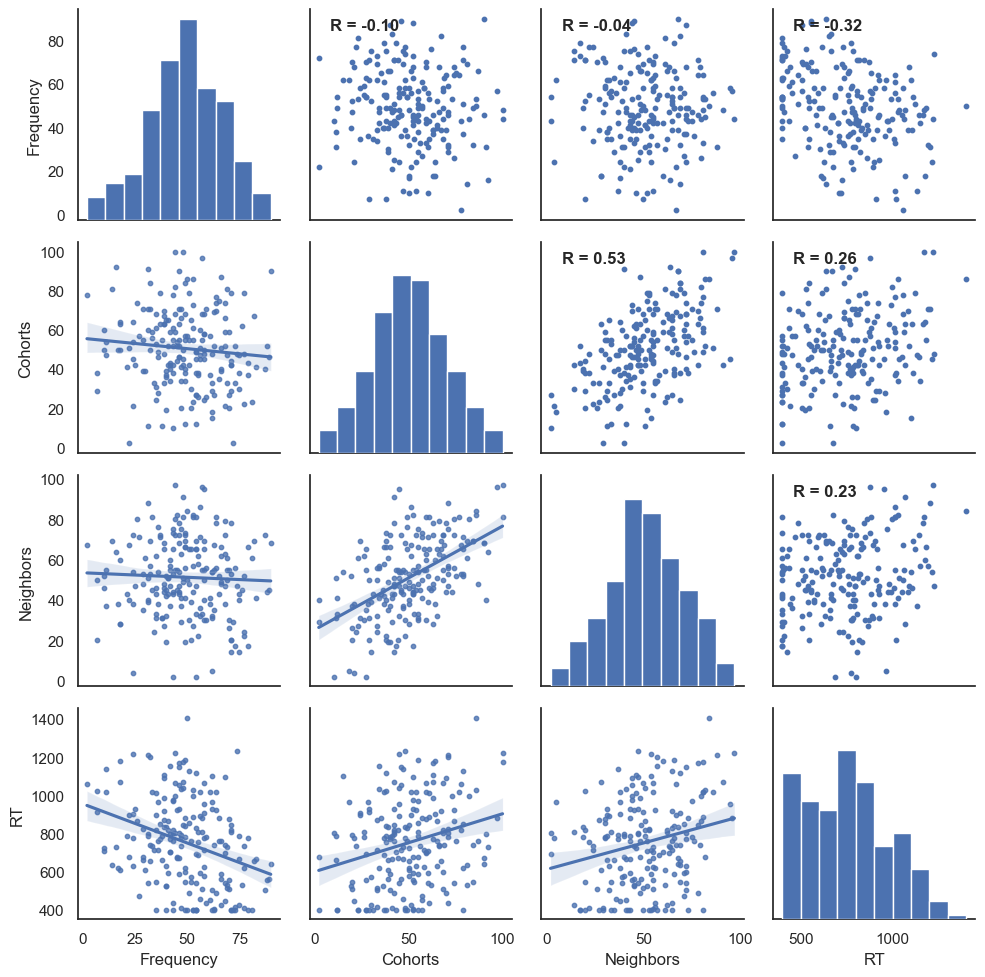

In [13]:

# Scatterplot matrix with corrected correlation function
sns.set(style="white")
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0,1]  # Corrected this line
    ax = plt.gca()
    ax.annotate(f"R = {r:.2f}", xy=(.1, .9), xycoords=ax.transAxes, fontweight="bold")

pair_grid = sns.PairGrid(df, vars=['Frequency', 'Cohorts', 'Neighbors', 'RT'], height=2.5)
pair_grid = pair_grid.map_upper(plt.scatter, s=10)
pair_grid = pair_grid.map_upper(corrfunc)
pair_grid = pair_grid.map_lower(sns.regplot, scatter_kws={'s':10})
pair_grid = pair_grid.map_diag(plt.hist)
plt.show()


-----------
### Lab report part 1

1. Go back to the code block that generates the data and prints a regression table. Run the code block 3 times. Each time, record the R-squared value you see in the table (top row, far right). Each time also re-run the scatterplot matrix block above. Report your 3 R-squared values, and any observations you can make about the whether different R-squared values seem to relate to the plots (they may not!).


-----------
### Visualization: 3D

The next few sections just show you other ways you can easily visualize data in Python. Please just review them and start getting a sense of what we can do, and why it might be useful to visualize data. 

With so many variables, it might be helpful to try to look at multiple relations at once by using 3d scatterplots. Here's an example.

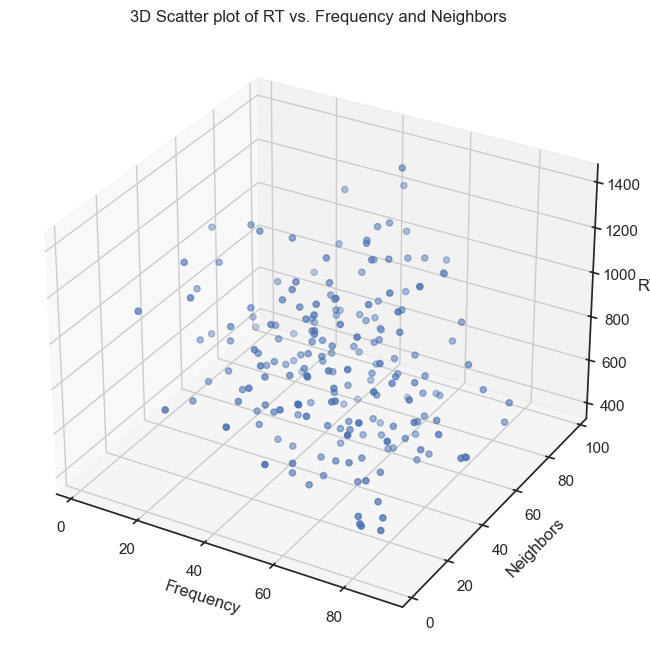

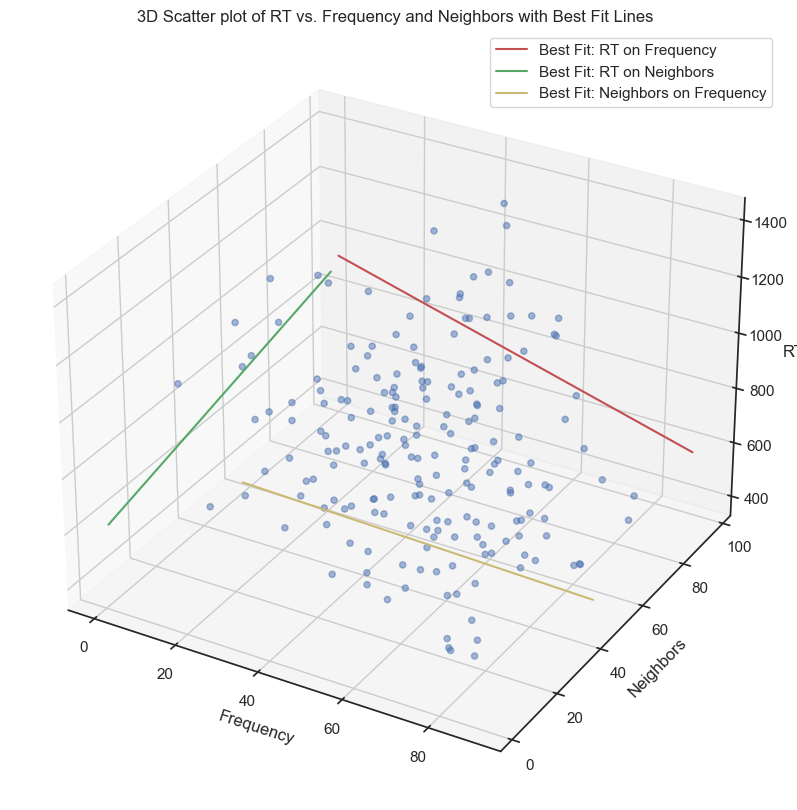

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Frequency'], df['Neighbors'], df['RT'], c='b', marker='o')

# Set labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Neighbors')
ax.set_zlabel('RT')
ax.set_title('3D Scatter plot of RT vs. Frequency and Neighbors')

#plt.show()

# Functions to compute the regression lines and get two end points for plotting

def compute_line_endpoints(x, y):
    # Linear regression to get slope and intercept
    slope, intercept = np.polyfit(x, y, 1)
    
    # Using min and max values of x to get two end points for the line
    x_vals = np.array([x.min(), x.max()])
    y_vals = slope * x_vals + intercept
    
    return x_vals, y_vals

# Calculate endpoints for the best fit lines
x_rt_freq, y_rt_freq = compute_line_endpoints(df['Frequency'].values, df['RT'].values)
x_rt_neigh, y_rt_neigh = compute_line_endpoints(df['Neighbors'].values, df['RT'].values)
x_neigh_freq, y_neigh_freq = compute_line_endpoints(df['Frequency'].values, df['Neighbors'].values)

# Plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Frequency'], df['Neighbors'], df['RT'], c='b', marker='o', alpha=0.5)

# Plot best fit lines
ax.plot(x_rt_freq, df['Neighbors'].max() * np.ones_like(x_rt_freq), y_rt_freq, color='r', label="Best Fit: RT on Frequency")
ax.plot((df['Frequency'].min()-2) * np.ones_like(x_rt_neigh), x_rt_neigh, y_rt_neigh, color='g', label="Best Fit: RT on Neighbors")
ax.plot(x_neigh_freq, y_neigh_freq, df['RT'].min() * np.ones_like(x_neigh_freq), color='y', label="Best Fit: Neighbors on Frequency")

# Set labels, title and legend
ax.set_xlabel('Frequency')
ax.set_ylabel('Neighbors')
ax.set_zlabel('RT')
ax.set_title('3D Scatter plot of RT vs. Frequency and Neighbors with Best Fit Lines')
ax.legend()

plt.show()


### Improving our 3D plot

Cool! Can we also add lines of best fit? Let's put them on the 'walls' and 'floor'.

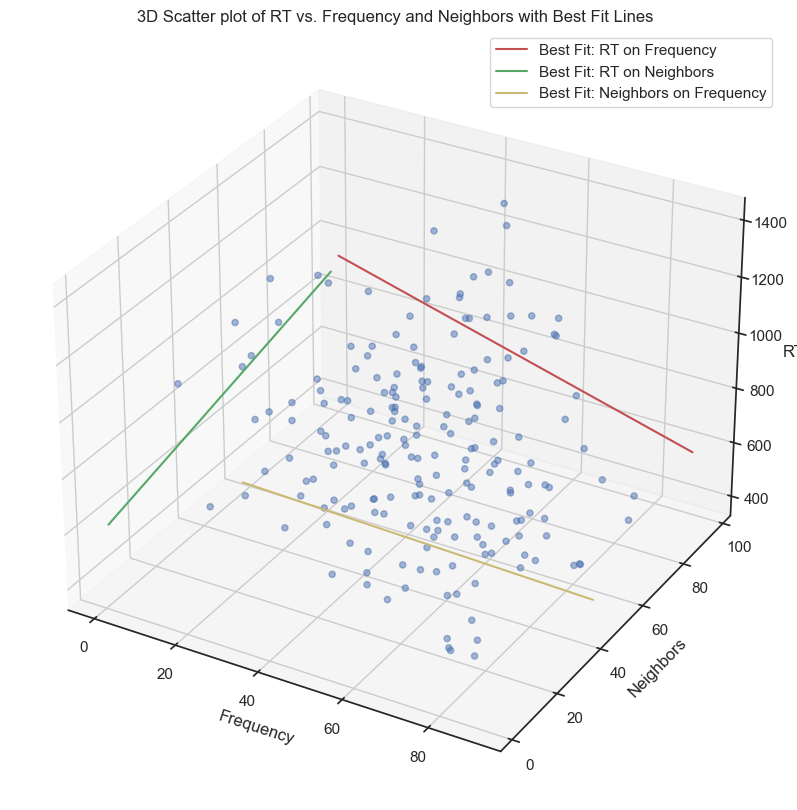

In [15]:
# Functions to compute the regression lines and get two end points for plotting

def compute_line_endpoints(x, y):
    # Linear regression to get slope and intercept
    slope, intercept = np.polyfit(x, y, 1)
    
    # Using min and max values of x to get two end points for the line
    x_vals = np.array([x.min(), x.max()])
    y_vals = slope * x_vals + intercept
    
    return x_vals, y_vals

# Calculate endpoints for the best fit lines
x_rt_freq, y_rt_freq = compute_line_endpoints(df['Frequency'].values, df['RT'].values)
x_rt_neigh, y_rt_neigh = compute_line_endpoints(df['Neighbors'].values, df['RT'].values)
x_neigh_freq, y_neigh_freq = compute_line_endpoints(df['Frequency'].values, df['Neighbors'].values)

# Plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Frequency'], df['Neighbors'], df['RT'], c='b', marker='o', alpha=0.5)

# Plot best fit lines
ax.plot(x_rt_freq, df['Neighbors'].max() * np.ones_like(x_rt_freq), y_rt_freq, color='r', label="Best Fit: RT on Frequency")
ax.plot((df['Frequency'].min()-2) * np.ones_like(x_rt_neigh), x_rt_neigh, y_rt_neigh, color='g', label="Best Fit: RT on Neighbors")
ax.plot(x_neigh_freq, y_neigh_freq, df['RT'].min() * np.ones_like(x_neigh_freq), color='y', label="Best Fit: Neighbors on Frequency")

# Set labels, title and legend
ax.set_xlabel('Frequency')
ax.set_ylabel('Neighbors')
ax.set_zlabel('RT')
ax.set_title('3D Scatter plot of RT vs. Frequency and Neighbors with Best Fit Lines')
ax.legend()

plt.show()


-----------
### An interactive 3D plot

This is better, but it is a bit hard to resolve some of the points and understand where they 
are in the 3D space. It would be great if we could rotate the plot. The `plotly` package 
provides tools for such interaction. Here's an example. 

Note that you can click and drag to rotate the 3dmatrix. You can use a scroll wheel to zoom in and out. 

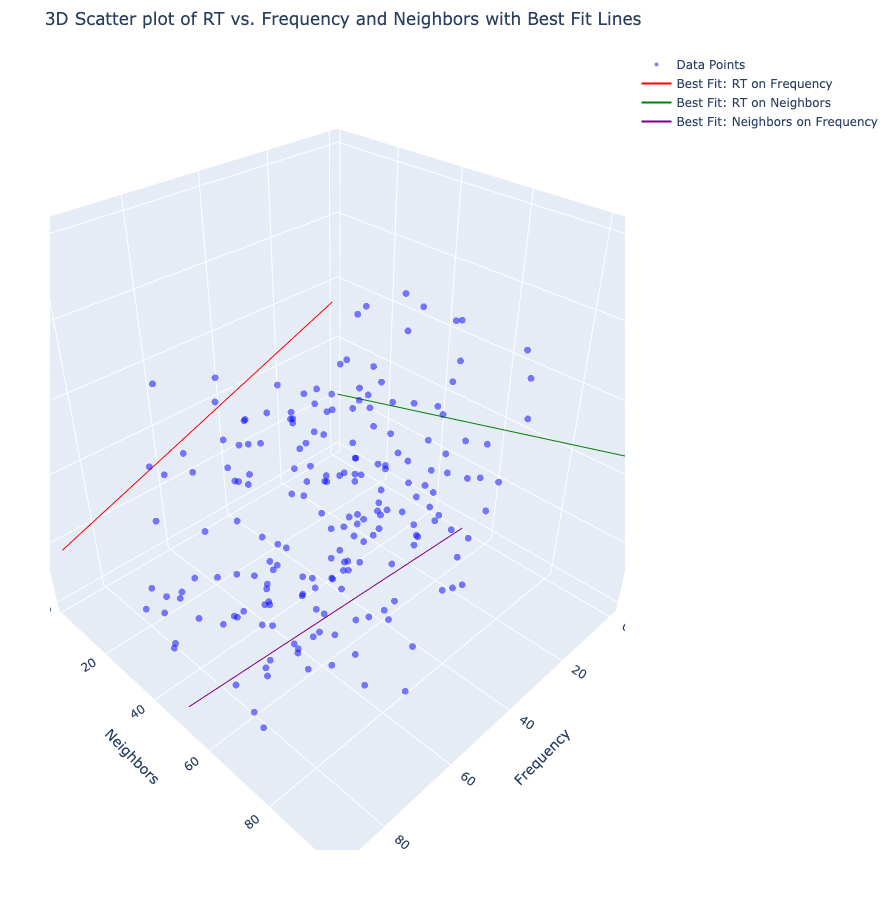

In [16]:
import plotly.graph_objects as go

# Create a scatter plot
scatter = go.Scatter3d(
    x=df['Frequency'],
    y=df['Neighbors'],
    z=df['RT'],
    mode='markers',
    marker=dict(size=4, opacity=0.5, color='blue'),
    name="Data Points"
)

# Create line plots for best fit lines
line_rt_freq = go.Scatter3d(
    x=x_rt_freq,
    y=df['Neighbors'].min() * np.ones_like(x_rt_freq),
    z=y_rt_freq,
    mode='lines',
    line=dict(color='red'),
    name="Best Fit: RT on Frequency"
)

line_rt_neigh = go.Scatter3d(
    x=(df['Frequency'].min()-2) * np.ones_like(x_rt_neigh),
    y=x_rt_neigh,
    z=y_rt_neigh,
    mode='lines',
    line=dict(color='green'),
    name="Best Fit: RT on Neighbors"
)

line_neigh_freq = go.Scatter3d(
    x=x_neigh_freq,
    y=y_neigh_freq,
    z=df['RT'].min() * np.ones_like(x_neigh_freq),
    mode='lines',
    line=dict(color='purple'),
    name="Best Fit: Neighbors on Frequency"
)

# Define the layout
layout = go.Layout(
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=50, t=50),
    scene=dict(
        xaxis_title="Frequency",
        yaxis_title="Neighbors",
        zaxis_title="RT"
    ),
    title="3D Scatter plot of RT vs. Frequency and Neighbors with Best Fit Lines"
)

# Combine traces and plot
fig = go.Figure(data=[scatter, line_rt_freq, line_rt_neigh, line_neigh_freq], layout=layout)
fig.show()


-----------
It can be very usefuln to put the lines of best fit on their respective planes, but we can also plot them in a centered fashion instead. 

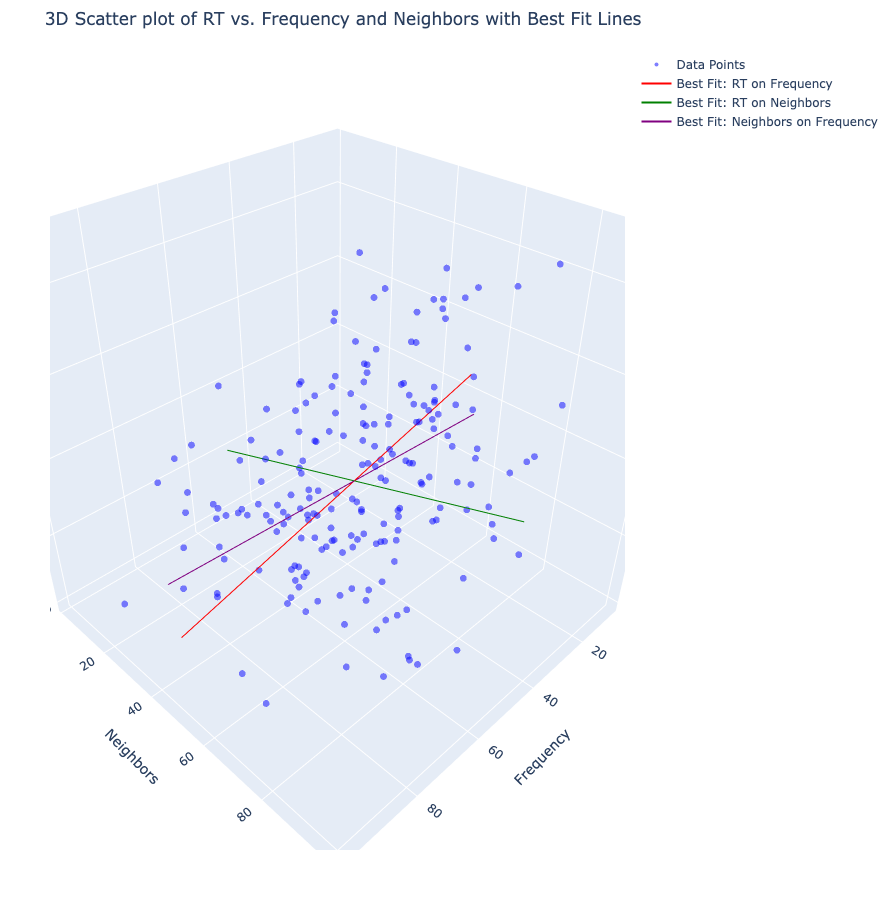

In [6]:
import plotly.graph_objects as go

# Create a scatter plot
scatter = go.Scatter3d(
    x=df['Frequency'],
    y=df['Neighbors'],
    z=df['RT'],
    mode='markers',
    marker=dict(size=4, opacity=0.5, color='blue'),
    name="Data Points"
)

# Create line plots for best fit lines
line_rt_freq = go.Scatter3d(
    x=x_rt_freq,
    y=df['Neighbors'].mean() * np.ones_like(x_rt_freq),
    z=y_rt_freq,
    mode='lines',
    line=dict(color='red'),
    name="Best Fit: RT on Frequency"
)

line_rt_neigh = go.Scatter3d(
    x=df['Frequency'].mean() * np.ones_like(x_rt_neigh),
    y=x_rt_neigh,
    z=y_rt_neigh,
    mode='lines',
    line=dict(color='green'),
    name="Best Fit: RT on Neighbors"
)

line_neigh_freq = go.Scatter3d(
    x=x_neigh_freq,
    y=y_neigh_freq,
    z=df['RT'].mean() * np.ones_like(x_neigh_freq),
    mode='lines',
    line=dict(color='purple'),
    name="Best Fit: Neighbors on Frequency"
)

# Define the layout
layout = go.Layout(
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=50, t=50),
    scene=dict(
        xaxis_title="Frequency",
        yaxis_title="Neighbors",
        zaxis_title="RT"
    ),
    title="3D Scatter plot of RT vs. Frequency and Neighbors with Best Fit Lines"
)

# Combine traces and plot
fig = go.Figure(data=[scatter, line_rt_freq, line_rt_neigh, line_neigh_freq], layout=layout)
fig.show()


-----------
### Lab report part 2

2. Play around with the interactive plot. See if you can discover how to rotate it and how to zoom in and out. Just write a short note about what you find for this answer.

3. **CHALLENGE QUESTION**: Briefly describe the logic of using pseudodata. Can you think of other things you could do with pseudodata? Can you think of risks of using pseudodata?

4. **CHALLENGE QUESTION**: In the empty code block below, create a 3d scatter plot but substitute Cohorts for one of the variables that you include. Describe how the plot compares to the plot above. Briefly say which variable you chose to remove and why.

In [7]:
# empty code block for the challenge question


-----------
### More statistical analysis

<code style="background:yellow;color:black">If you are not a PhD student and you are not interested in statistics, you can skip the rest of this notebook. This is really just included for those curious about doing more complex stats with Python.</code>

Above, we did a simple multiple regression approach just looking at 
main effects. Let's add interactions. 

*Note.* In linear regression, adding a constant term allows for the 
inclusion of an intercept in the model. If you don't include a constant 
term, the regression line will be forced to go through the origin (i.e., 
(0,0) in the 2D case).

More technically, without a constant term, the equation for the regression line is:

$$
y = \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

With a constant, it becomes:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Where:
- $\beta_0$ is the intercept term.
- $\beta_1, \beta_2, \dots, \beta_n$ are coefficients for the predictors $x_1, x_2, \dots, x_n$.

By including the intercept (constant term), you're allowing the regression line to 
best fit the data without the constraint of passing through the origin. In many 
real-world applications, it's essential to have an intercept, as it represents the 
expected mean value of $y$ when all $x$ predictors are 0.

However, in some specific contexts, you might intentionally skip the intercept if 
you have theoretical or practical reasons to believe that the response should be 0 
when all predictors are 0.

In `statsmodels`, the regression functions do not automatically add an intercept to 
your model, so you have to add it manually using `sm.add_constant()`. In contrast, 
many other packages (like Scikit-learn) do automatically add an intercept.


In [8]:
import statsmodels.api as sm

# first, repeat the regression from above for comparison
# Multiple Regression
X = df[['Frequency', 'Cohorts', 'Neighbors']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['RT']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# NOW DO THE MODEL WITH statsmodels

# Multiple Regression
X = df[['Frequency', 'Cohorts', 'Neighbors']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X)
results = model.fit()
results.summary()


                            OLS Regression Results                            
Dep. Variable:                     RT   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     7.843
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           5.72e-05
Time:                        11:30:57   Log-Likelihood:                -1346.2
No. Observations:                 200   AIC:                             2700.
Df Residuals:                     196   BIC:                             2714.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        727.3768     62.055     11.721      0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RT   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     7.843
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           5.72e-05
Time:                        11:30:57   Log-Likelihood:                -1346.2
No. Observations:                 200   AIC:                             2700.
Df Residuals:                     196   BIC:                             2714.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        727.3768     62.055     11.721      0.000     604.995     849.758
Frequency     -2.4091      0.797     -3.022      0.003      -3.981      -0.837
Cohorts       -0.2860      0.939     -0.305      0.761      -2.138       1.566
Neighbors      2.9619      0.931      3.183      0.002       1.127       4.797
==============================================================================
Omnibus:                        7.300   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                4.022
Skew:                           0.123   Prob(JB):                        0.134
Kurtosis:                       2.350   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# NOW DO THE MODEL WITH INTERACTIONS

# Create interaction terms
df['Freq_Cohorts'] = df['Frequency'] * df['Cohorts']
df['Freq_Neighbors'] = df['Frequency'] * df['Neighbors']
df['Cohorts_Neighbors'] = df['Cohorts'] * df['Neighbors']

# Multiple Regression with interaction terms
X = df[['Frequency', 'Cohorts', 'Neighbors', 'Freq_Cohorts', 'Freq_Neighbors', 'Cohorts_Neighbors']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RT   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     4.359
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           0.000376
Time:                        11:30:57   Log-Likelihood:                -1344.9
No. Observations:                 200   AIC:                             2704.
Df Residuals:                     193   BIC:                             2727.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               504.3622    177.024      2.849      0.005     155.212     853.512
Frequency             1.0089      2.626      0.384      0.701      -4.170       6.188
Cohorts               0.4364      3.570      0.122      0.903      -6.606       7.478
Neighbors             7.4484      3.482      2.139      0.034       0.582      14.315
Freq_Cohorts          0.0051      0.052      0.098      0.922      -0.097       0.108
Freq_Neighbors       -0.0711      0.054     -1.311      0.191      -0.178       0.036
Cohorts_Neighbors    -0.0167      0.039     -0.433      0.666      -0.093       0.059
==============================================================================
Omnibus:                        7.582   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.156
Skew:                           0.131   Prob(JB):                        0.125
Kurtosis:                       2.344   Cond. No.                     6.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--------------
**The next code block shows how to print some key parameters from the model...**

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create interaction terms
df['Freq_Cohorts'] = df['Frequency'] * df['Cohorts']
df['Freq_Neighbors'] = df['Frequency'] * df['Neighbors']
df['Cohorts_Neighbors'] = df['Cohorts'] * df['Neighbors']

# Prepare predictor variables and target variable
X = df[['Frequency', 'Cohorts', 'Neighbors', 'Freq_Cohorts', 'Freq_Neighbors', 'Cohorts_Neighbors']]
y = df['RT']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print out the coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# To get R^2 and other metrics, you can use:
r2_score = model.score(X, y)
print("R^2 Score:", r2_score)

# For mean squared error:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Intercept: 504.3622454373914
Coefficients: [ 1.00887120e+00  4.36423894e-01  7.44842045e+00  5.07052549e-03
 -7.11031833e-02 -1.66794835e-02]
R^2 Score: 0.11933244361738982
Mean Squared Error: 40571.89433249814


---------
**The next code block shows how to get the same values plus p-values in a more readable form.**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np

# Create interaction terms
df['Freq_Cohorts'] = df['Frequency'] * df['Cohorts']
df['Freq_Neighbors'] = df['Frequency'] * df['Neighbors']
df['Cohorts_Neighbors'] = df['Cohorts'] * df['Neighbors']

# Prepare predictor variables and target variable
X = df[['Frequency', 'Cohorts', 'Neighbors', 'Freq_Cohorts', 'Freq_Neighbors', 'Cohorts_Neighbors']]
y = df['RT']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Getting coefficients, intercept, and other metrics
coefficients = model.coef_
intercept = model.intercept_
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = model.score(X, y)

# Calculating p-values for coefficients
X_with_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_with_const).fit()
p_values = ols_model.pvalues[1:]  # exclude intercept

# Creating a summary dataframe
summary_df = pd.DataFrame({"Coefficient": coefficients, 
                           "P-Value": p_values})
summary_df.index = ['Frequency', 'Cohorts', 'Neighbors', 'Freq_Cohorts', 'Freq_Neighbors', 'Cohorts_Neighbors']
summary_df.loc['Intercept', 'Coefficient'] = intercept

print(summary_df)

# Additional metrics
print("\nR^2:", r2)
print("Mean Squared Error:", mse)


                   Coefficient   P-Value
Frequency             1.008871  0.701255
Cohorts               0.436424  0.902841
Neighbors             7.448420  0.033661
Freq_Cohorts          0.005071  0.922338
Freq_Neighbors       -0.071103  0.191485
Cohorts_Neighbors    -0.016679  0.665770
Intercept           504.362245       NaN

R^2: 0.11933244361738982
Mean Squared Error: 40571.89433249814
